# Process Capability Analysis — normal data

The voice of the process (e.g., UCL, LCL) was considered in the sections on control 
charts. However, a question remains, “Is the process capable of meeting customer 
needs?” That is, will the process operate within the Upper and Lower Specification 
Limits (USL, LSL)—these are set by the customer, not the process. It is important 
to know in the Measure phase whether our process is capable of meeting customer 
needs.

In [1]:
import pandas as pd
import numpy as np
from stats_plots import imr_chart, last25_pp
import matplotlib.pyplot as plt
import manufacturing as mn
import scipy.stats as stats
plt.style.use('classic')

In [2]:
# Replace with your actual Excel path/sheet
xls = pd.ExcelFile("Six Sigma_Case Study.xlsx")
df = (
    pd.read_excel(xls, 
                   sheet_name="Process Capability")
        .dropna(how="all")
)
df.columns = df.columns.str.strip()
df.head()

,Brake Caliper Torsion IMR,Unnamed: 1,Airbag tensile strength
0,76.660378,NaN,40.862281
1,80.366125,NaN,13.821355
2,77.246828,NaN,3.924765
3,79.072676,NaN,4.062451
4,77.328160,NaN,5.893562


In [3]:
col_name = "Brake Caliper Torsion IMR"
data = df[col_name].dropna().astype(float).values
data

array([76.66037847, 80.36612545, 77.24682799, 79.07267629, 77.32815997,
       76.97577977, 78.23239075, 78.95851164, 76.92232896, 78.87528311,
       77.69356048, 77.2532003 , 77.80362173, 78.65668081, 77.18205142,
       77.07925734, 75.82462632, 78.02795179, 78.96160124, 79.02363753,
       78.04173287, 76.27252369, 77.42208612, 78.14955514, 78.16915425,
       77.83245394, 77.39981193, 78.40806544, 76.96403352, 78.02341185])

## IMR Chart

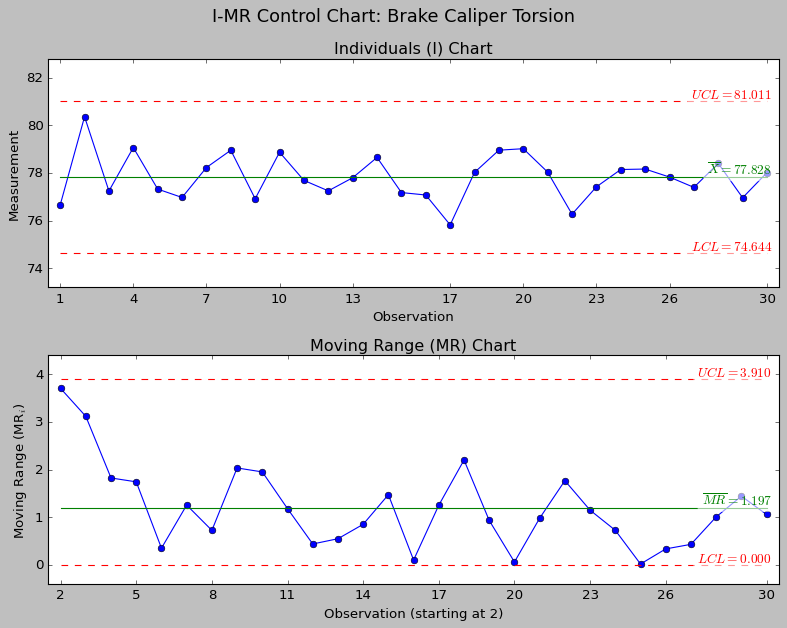

In [4]:
imr_chart(df["Brake Caliper Torsion IMR"], title="Brake Caliper Torsion")

## Last 25 observations and Normal Probability Plot

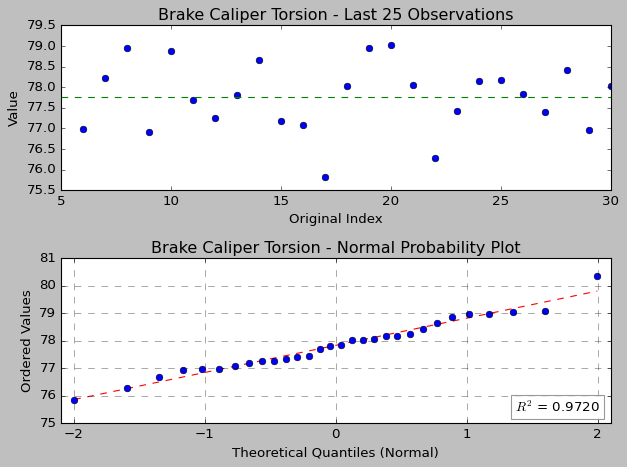

{'mean_last25': np.float64(77.76613247790223),
 'r_squared': np.float64(0.971959020960196)}

In [5]:
last25_pp(data, title_prefix="Brake Caliper Torsion")

## Capability Histogram

<Figure size 800x640 with 0 Axes>

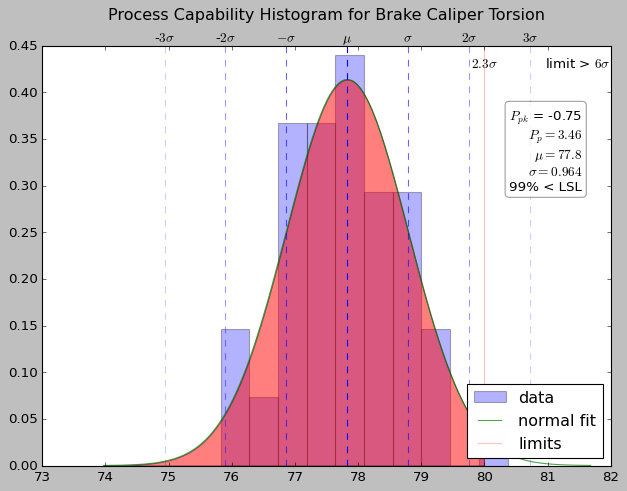

In [11]:
# 🛑 2. Define Specification Limits 🛑
# Replace these values with the actual LSL, USL, and Target for your brake caliper torsion process!
LSL = 80.0  # Example Lower Specification Limit
USL = 100.0 # Example Upper Specification Limit
TARGET = 90.0 # Example Target (Optional, but highly recommended)

# --- 3. Generate Capability Histogram (Ppk Plot) ---
plt.figure(figsize=(10, 8))

# CORRECTED CALL: Target argument is removed
mn.ppk_plot(
    data=data, 
    lower_specification_limit=LSL, 
    upper_specification_limit=USL,
    #target=TARGET  <--- NO LONGER INCLUDED
)

plt.title('Process Capability Histogram for Brake Caliper Torsion',
         y=1.05)
plt.show()

- Ppk is $-0.75<1$, process is not capable.